## Part a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
x = '''0 0 0 -4 0 0 0 0 0 0 2 2 2 2 
2 0 -3 -3 -3 0 0 0 0 0 1 -4 0 4 
3 -1 2 -3 -1 0 2 -4 -2 1 0 0 0 3 
-3 3 -3 3 -3 3 -3 3 -3 0 0 0 0 0 0'''
x = map(lambda i: float(i.strip('\n')), x.split(' '))
x = list(x)
indices = [i for i in range(len(x))]

In [3]:
def plot_linegraph(x, y, marker='o', linestyle='-'):
    plt.scatter(x, y, marker=marker)
    plt.plot(x, y, linestyle=linestyle)
    plt.hlines(0, -1, len(x), linestyle='dotted', color='black')
    plt.xlim(-1, len(x))
    plt.gcf().set_size_inches(12., 5., forward=True)
    

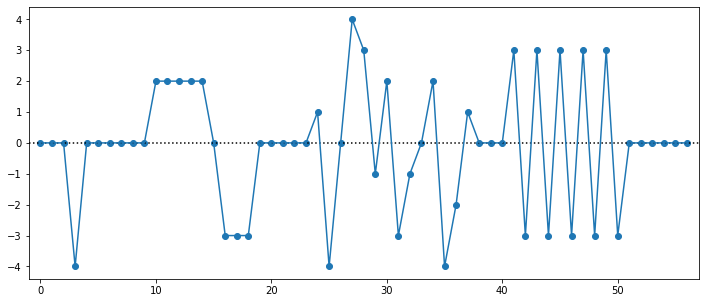

In [4]:
plot_linegraph(indices, x)

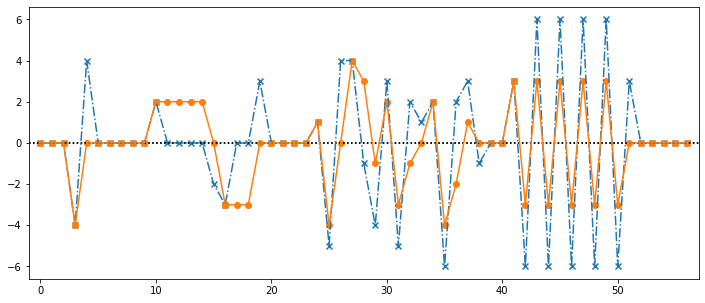

In [5]:
x_backward_difference = signal.lfilter([1, -1], [1], x)
plot_linegraph(indices, x_backward_difference, marker='x', linestyle='-.')
plot_linegraph(indices, x)

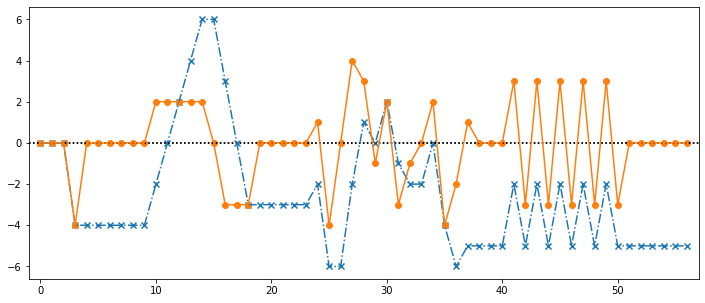

In [6]:
x_accumulator = signal.lfilter([1], [1, -1], x)
plot_linegraph(indices, x_accumulator, marker='x', linestyle='-.')
plot_linegraph(indices, x)

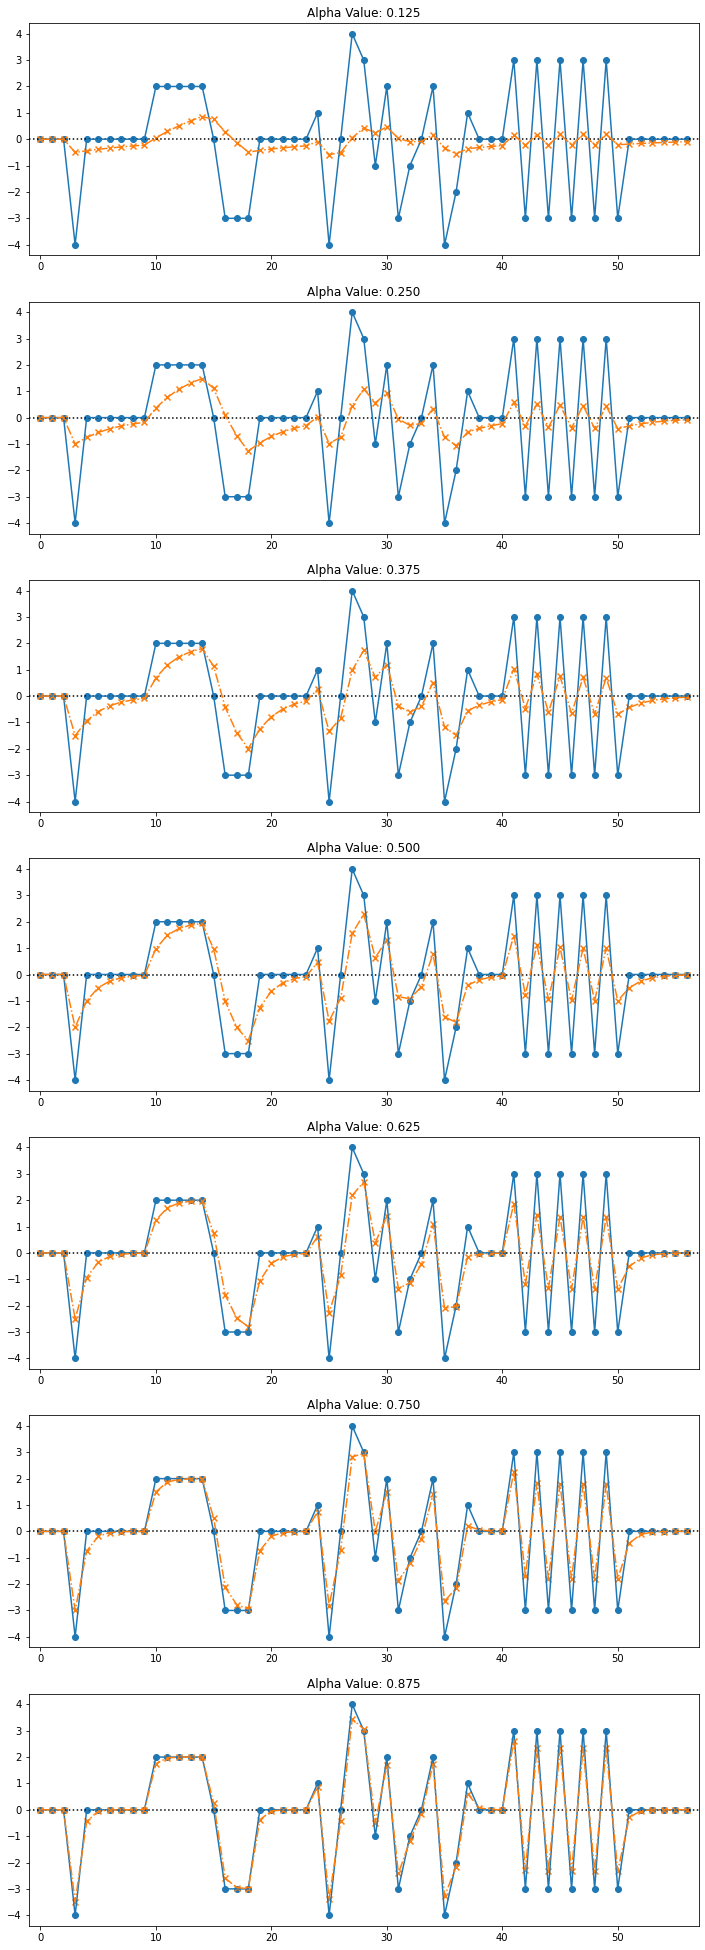

In [7]:
n = 8
fig, axs = plt.subplots(n-1)
fig.set_size_inches(12., (n-1)*5., forward=True)
v = 1 / n
plt.xlim(-1, len(x))
for i in range(n-1):
    alpha = (i+1)*v
    x_exponen = signal.lfilter([alpha], [1., alpha-1], x)
    axs[i].scatter(indices, x)
    axs[i].plot(indices, x)
    axs[i].scatter(indices, x_exponen, marker='x')
    axs[i].plot(indices, x_exponen, linestyle='-.')
    axs[i].set_title('Alpha Value: %.3f'%alpha)
    axs[i].hlines(0, -1, len(x), color='black', linestyle='dotted')
    axs[i].set_xlim(-1, len(x))
    

$\Sigma$

## Part (b)

In [103]:
low_pass_45 = signal.firwin(50, 45/150)
low_pass_50 = signal.firwin(50, 50/150)
def reconstruction_filter(t, X, fs):
    # t is the timestamp we are looking for
    # Fs is original frequency of sampling 300
    # X is the new sampled signal
    # fs is the new sampling frequency
    sincs = np.sinc(t*fs - np.arange(100))
    output = np.dot(X, sincs)
    return output

In [104]:
r = np.random.normal(0, 1, size=300)
r = np.concatenate([np.zeros(15), r, np.zeros(15)])
x = signal.filtfilt(low_pass_45, [1.], r)
y = [x[i] if i%3==0 else 0 for i in range(330)]

In [ ]:
X = [y[i] if i%3==0 else -1 for i in range(330)]
X = np.array(X)
X = X[X != -1]

In [93]:
z = []
Fs = 300
fs = 100
for i in range(330):
    z.append(reconstruction_filter(i/Fs, X, fs))

ValueError: shapes (110,) and (100,) not aligned: 110 (dim 0) != 100 (dim 0)

In [94]:
u = 3*(signal.filtfilt(low_pass_50, [1.], y))

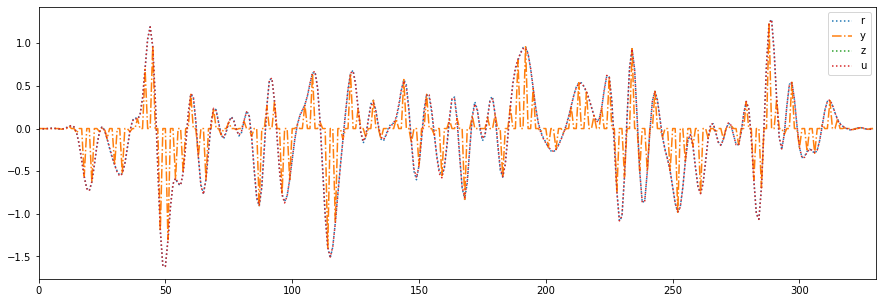

In [95]:
ind = np.arange(330)
N = 330
plt.plot(x[:N], label='r', linestyle=':')
plt.plot(y[:N], label='y', linestyle='-.')
plt.plot(z[:N], label='z', linestyle=':')
plt.plot(u[:N], label='u', linestyle=':')
plt.gcf().set_size_inches(15., 5., forward=True)
plt.xlim(0, N)
plt.legend()

In [97]:
z = np.array(z)
u = np.array(u)
x = np.array(x)
print(f'square error in u-z = {np.sum((u-z)**2)} \
& in z-x {np.sum((x-z)**2)} \
& in x-u {np.sum((u-x)**2)}')

ValueError: operands could not be broadcast together with shapes (330,) (0,) 